In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv(r"C:\Users\defaultuser0.LAPTOP-LRB3T941\Documents\Tensorflow\DATASETS\TITANIC.csv" )

In [4]:
print(pd.__version__)

1.5.3


In [6]:
data.head()
data.isnull().sum()
for i in range(len(data)):
    if pd.isna(data['Age'][i]):
        data['Age'][i]=data['Age'].median()
#nan=np.nan        
print(data['Age'][5])

28.0


In [63]:
def ploter(data,Age,target='Survived',target_value=1):
    def hello(item):
        try:
            
            total_sur=len(data[(data[Age]==item) & (data[target]==target_value)])/(len(data[data[Age]==item]))

        except:
            pass
        return total_sur
 
    for i in range(len(data)):
        try:
            plt.bar(data[Age][i], hello(data[Age][i]))
        except:
            pass
    plt.xlabel(Age)
    plt.ylabel(f'No survivor / total passenger of {Age}')
    plt.show()        

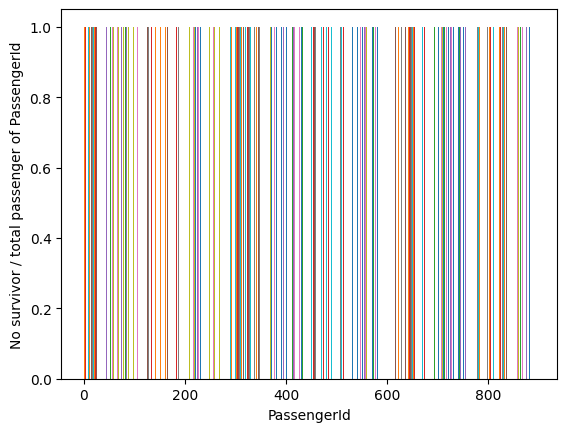

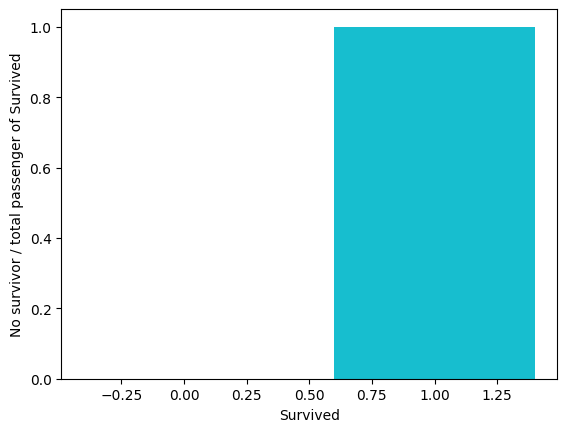

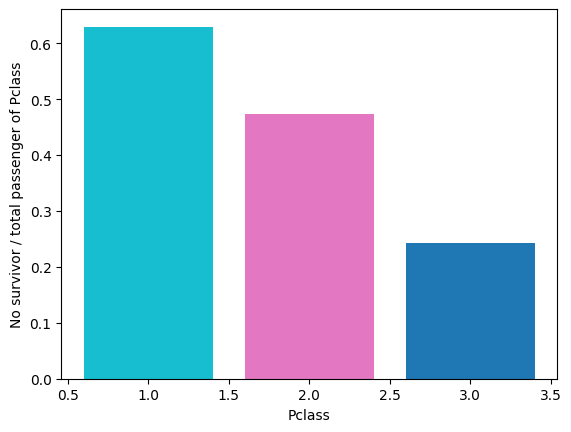

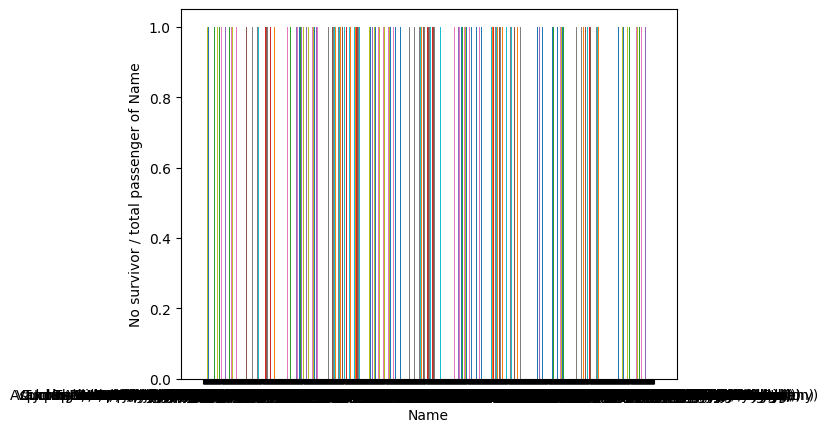

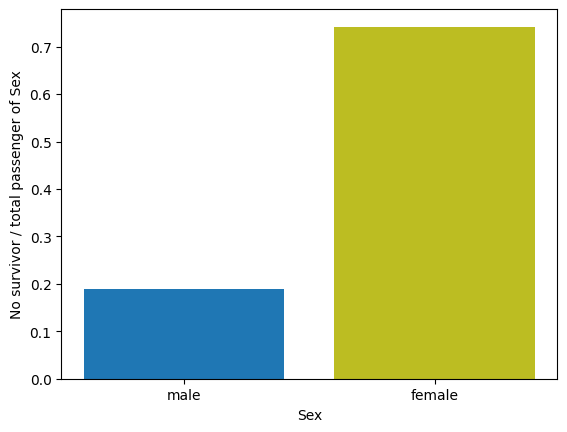

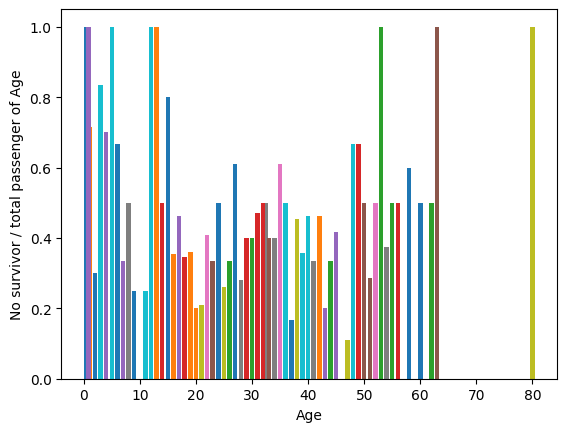

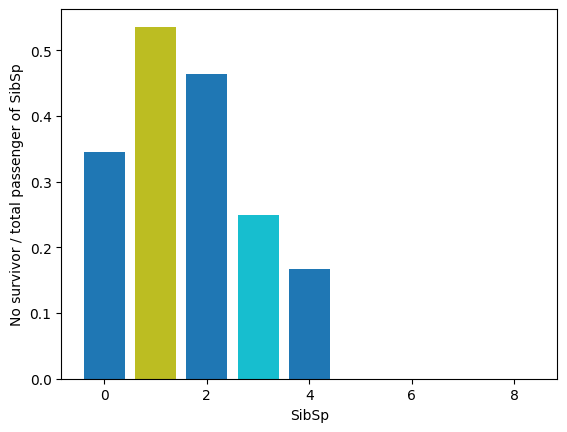

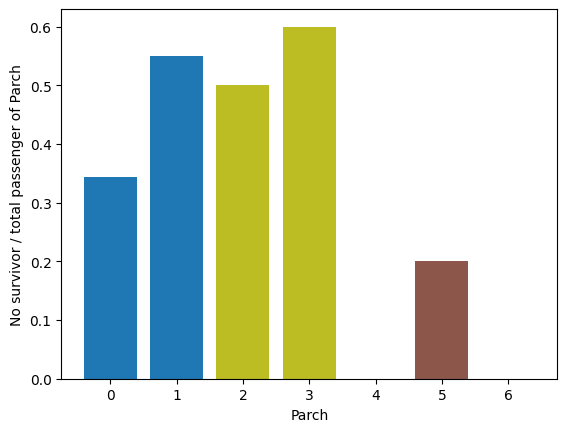

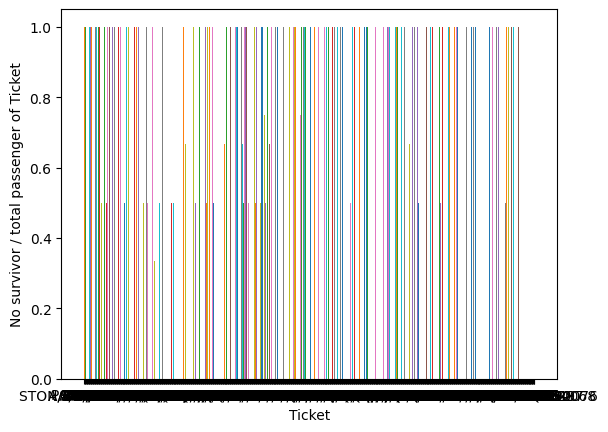

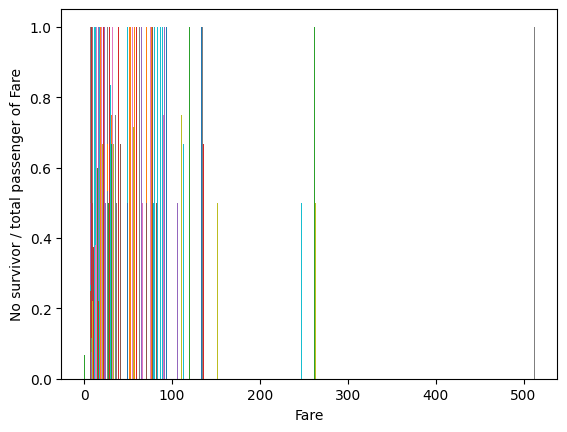

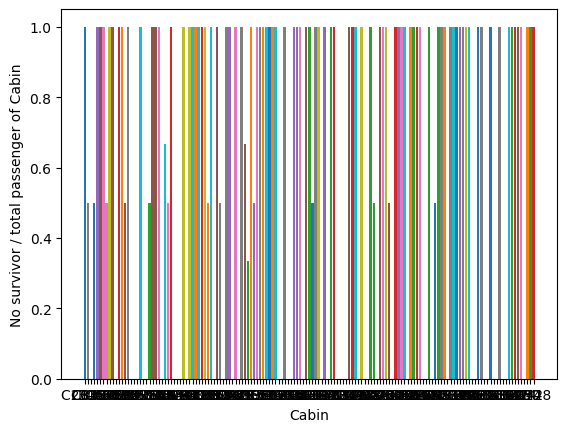

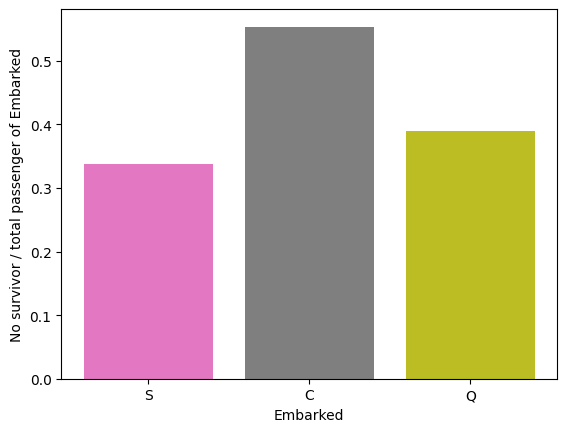

In [5]:
indexer =['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
for item in indexer:
    ploter(data,item)

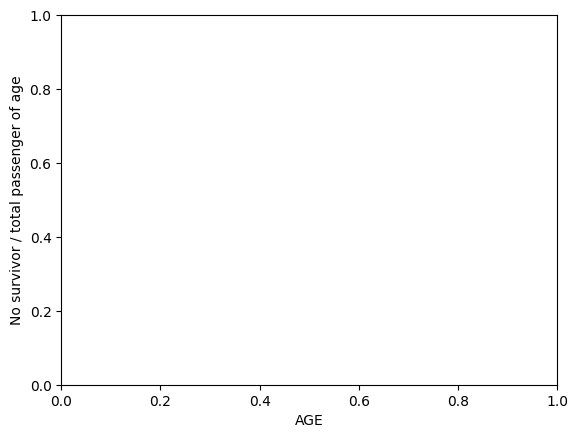

In [6]:
#fig,ax=plt.subplot()
for i in range(len(data)):
    try:
        plt.bar(data['Age'][i], hello(data,data['Age'][i]))
    except:
        pass
plt.xlabel('AGE')
plt.ylabel('No survivor / total passenger of age')
plt
plt.show()

In [6]:
print(data['Age'].mean(),data['Age'].median())


data.head()
#print(data.columns)

29.36158249158249 28.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
"""   SO REMOVE :- NAME,TICKET , CABIN &    PASSENGERID """


data=data.drop('PassengerId',axis=1)
data=data.drop('Name',axis=1)
data=data.drop('Cabin',axis=1)
data=data.drop('Ticket',axis=1)



In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
data=pd.get_dummies(data,drop_first=True)
Y=data.pop('Survived')
X=data
X.head()
#X.isna().sum()
#for i in range(len(X)):
#    if 

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [1]:
"""NOW I SHOULD SCALE THE DATA,AT FIRST MAKE AN UNSCALLED COPY TO EVALUATE LATER """
#data_unscaled=data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=666)

NameError: name 'X' is not defined

In [73]:
#create a function\from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

def SUCKER(i):
    models=[Lasso(),LogisticRegression(),LinearRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
    return models[i]
lister=[]
def make_everything_daddy(i):
    def make_model_daddy():
        steps=[('scale',StandardScaler()),('model',SUCKER(i))]
        pipe=Pipeline(steps)
        model=pipe.fit(X_train,y_train)
        return model
    score=make_model_daddy().score(X_test,y_test)
    lister.append(score)
    return lister
    
    


In [74]:
for i in range(5):
    make_everything_daddy(i)
print(lister)


[-0.0008655049726353781, 0.7982062780269058, 0.402195225007155, 0.7802690582959642, 0.8071748878923767]


In [85]:
modelss=['Lasso()','LogisticRegression()','LinearRegression()','DecisionTreeClassifier()','KNeighborsClassifier()']
datas={}
for i in range(5):
    datas[str(modelss[i])]=lister[i]
#plt.boxplot(lister)#labels=['Lasso()','LogisticRegression()','LinearRegression()','DecisionTreeClassifier()','KNeighborsClassifier()'])
#lt.show()
#plt.plot(lister)
#plt.show()
print(datas)

{'Lasso()': -0.0008655049726353781, 'LogisticRegression()': 0.7982062780269058, 'LinearRegression()': 0.402195225007155, 'DecisionTreeClassifier()': 0.7802690582959642, 'KNeighborsClassifier()': 0.8071748878923767}


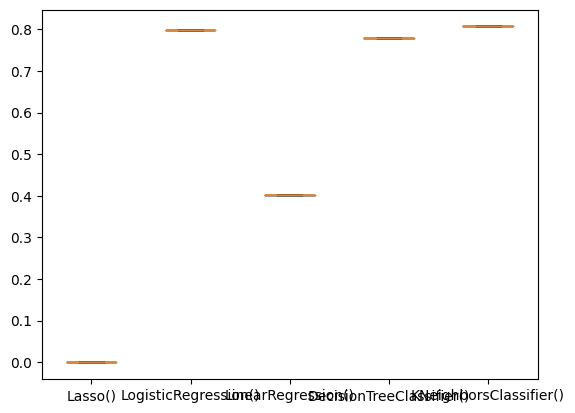

In [105]:
#df=pd.DataFrame(datas)
#import seaborn as sns
values = [[v] for v in datas.values()]

plt.boxplot(values)
plt.xticks(range(1, 6), datas.keys())

plt.show()


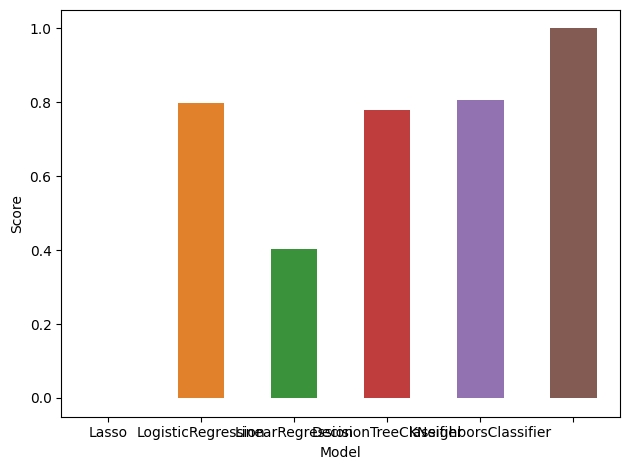

In [128]:
import seaborn as sns
dick={'Lasso': -0.0008655049726353781, 'LogisticRegression': 0.7982062780269058, 'LinearRegression': 0.402195225007155, 'DecisionTreeClassifier': 0.7802690582959642, 'KNeighborsClassifier': 0.8071748878923767,' ':1}
df = pd.DataFrame(dick.items(), columns=["Model", "Score"])
sns.barplot(data=df, x="Model", y="Score",width=.5,errwidth=40,hue_order=77,orient='v')
plt.tight_layout()

plt.show()

"""  """ USE GRADIANT BOOSTING

In [2]:
import numpy as np
p=.5
entropy=-1*p*np.log2(p)-   (1*(1-p)*np.log2(1-p))
print(entropy)

1.0
